In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import tensorflow.keras.backend as K
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import glob
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/Users/M S I/Desktop/iot/IoT Network Intrusion Dataset.csv')  

# Example of converting text labels to binary values
df['Label'] = df['Label'].map({'Normal': 0, 'Anomaly': 1})

Normal_df = df[df['Label'] == 0]

Normal_df.to_csv('normal.csv', index=False)

In [6]:
dataset = Normal_df

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40073 entries, 17 to 625781
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow_ID            40073 non-null  object 
 1   Src_IP             40073 non-null  object 
 2   Src_Port           40073 non-null  int64  
 3   Dst_IP             40073 non-null  object 
 4   Dst_Port           40073 non-null  int64  
 5   Protocol           40073 non-null  int64  
 6   Timestamp          40073 non-null  object 
 7   Flow_Duration      40073 non-null  int64  
 8   Tot_Fwd_Pkts       40073 non-null  int64  
 9   Tot_Bwd_Pkts       40073 non-null  int64  
 10  TotLen_Fwd_Pkts    40073 non-null  float64
 11  TotLen_Bwd_Pkts    40073 non-null  float64
 12  Fwd_Pkt_Len_Max    40073 non-null  float64
 13  Fwd_Pkt_Len_Min    40073 non-null  float64
 14  Fwd_Pkt_Len_Mean   40073 non-null  float64
 15  Fwd_Pkt_Len_Std    40073 non-null  float64
 16  Bwd_Pkt_Len_Max    40073 

In [8]:

import ipaddress
import pandas as pd


dataset['Src_IP'] = dataset['Src_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
dataset['Dst_IP'] = dataset['Dst_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))





In [9]:
columns_to_drop = [
                    'Flow_ID',
                    'Timestamp',
                    # 'Label',
                   'Cat',
                   'Sub_Cat',
]
dataset = dataset.drop(columns=columns_to_drop)

In [10]:

# Remove duplicate rows
dataset = dataset.drop_duplicates()

# Remove rows with any null or NaN values
dataset = dataset.dropna()



Duplicate Rows:
            Src_IP  Src_Port      Dst_IP  Dst_Port  Protocol  Flow_Duration  \
1789    3232235533      9020  3232235536     49784         6            300   
2562    3232235533      9020  3232235536     49784         6            300   
2982    3232235533      9020  3232235536     49784         6             74   
3184    3232235533      9020  3232235536     49784         6            394   
3386    3232235533      9020  3232235536     49784         6            295   
...            ...       ...         ...       ...       ...            ...   
625613  3232235533      9020  3232235536     49784         6            440   
625628  3232235536     49789  3232235533      9020         6            415   
625634  3232235533      9020  3232235536     49784         6            289   
625643  3232235533      9020  3232235536     49784         6            119   
625678  3232235533      9020  3232235536     49784         6            346   

        Tot_Fwd_Pkts  Tot_Bwd_Pkts 

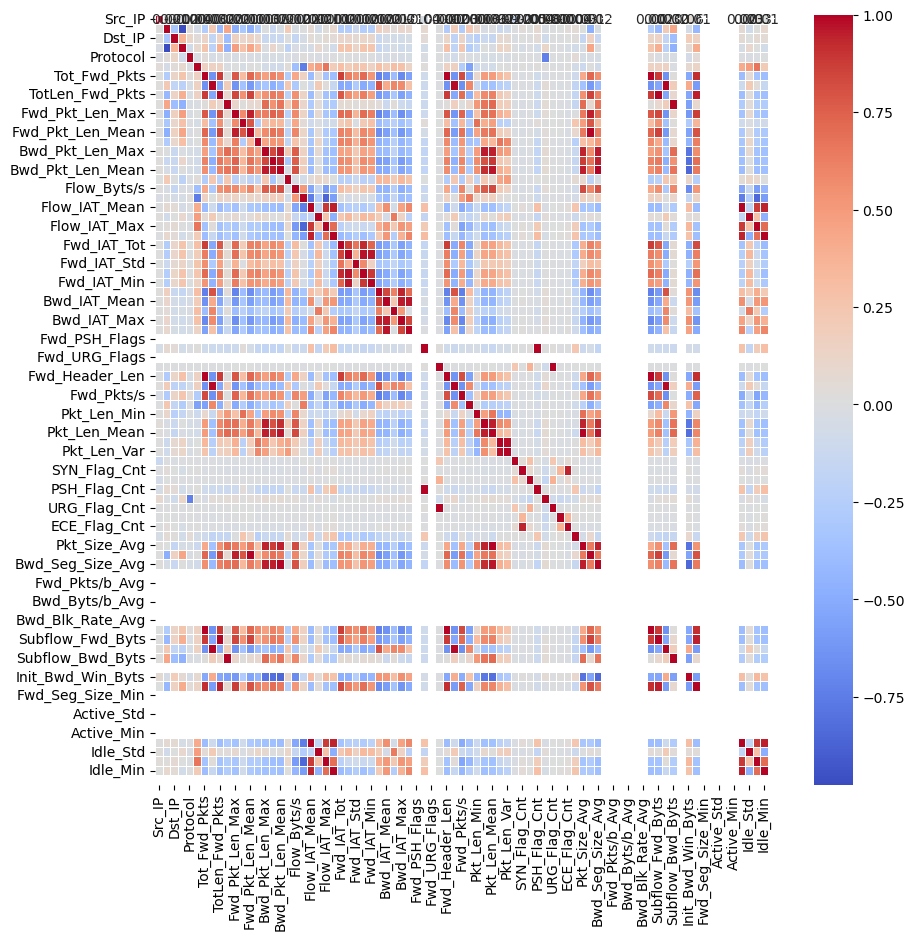

In [11]:
#plotting correlational matrix heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f')
plt.show()

In [12]:
columns_to_drop = [
                    'Flow_IAT_Mean',
                    'Flow_IAT_Std',
                    'Flow_IAT_Max',
                    'Flow_IAT_Min',
                    'Fwd_IAT_Tot',
                    'Fwd_IAT_Mean',
                    'Fwd_IAT_Max',
                    'Fwd_IAT_Min',
                    'Bwd_IAT_Tot',
                    'Bwd_IAT_Mean',
                    'Bwd_IAT_Max',
                    'Bwd_IAT_Min',
                     'Fwd_Pkt_Len_Max',
                     'Fwd_Pkt_Len_Min',
                     'Fwd_Pkt_Len_Mean',
                     'Fwd_Pkt_Len_Std',
                     'Bwd_Pkt_Len_Max',
                     'Bwd_Pkt_Len_Min',
                     'Bwd_Pkt_Len_Mean',
                     'Bwd_Pkt_Len_Std',
                     'Pkt_Len_Mean',
                    'Pkt_Len_Var',
                    'Idle_Mean',
                     'Idle_Std',
                     'Idle_Max',
                     'Idle_Min',
                     'Subflow_Fwd_Pkts',
                 'Subflow_Fwd_Byts',
                 'Subflow_Bwd_Pkts',
                 'Subflow_Bwd_Byts',
                    'Fwd_Header_Len',
                'Bwd_Header_Len',
                'Fwd_PSH_Flags',
                'Bwd_PSH_Flags',
                'Fwd_URG_Flags',
                'Fwd_Byts/b_Avg',
                 'Fwd_Pkts/b_Avg',
                 'Fwd_Blk_Rate_Avg',
                 'Bwd_Byts/b_Avg',
                 'Bwd_Pkts/b_Avg',
                 'Bwd_Blk_Rate_Avg',
                 'Init_Fwd_Win_Byts',
                 'Init_Bwd_Win_Byts',
                    'Fwd_Seg_Size_Min',
                 'Active_Mean',
                 'Active_Std',
                 'Active_Max',
                 'Active_Min',
                'Pkt_Size_Avg',
             'Fwd_Seg_Size_Avg',
             'Bwd_Seg_Size_Avg',
             'Fwd_Act_Data_Pkts',
                'Bwd_URG_Flags',
                'ECE_Flag_Cnt',                  
]
dataset = dataset.drop(columns=columns_to_drop)

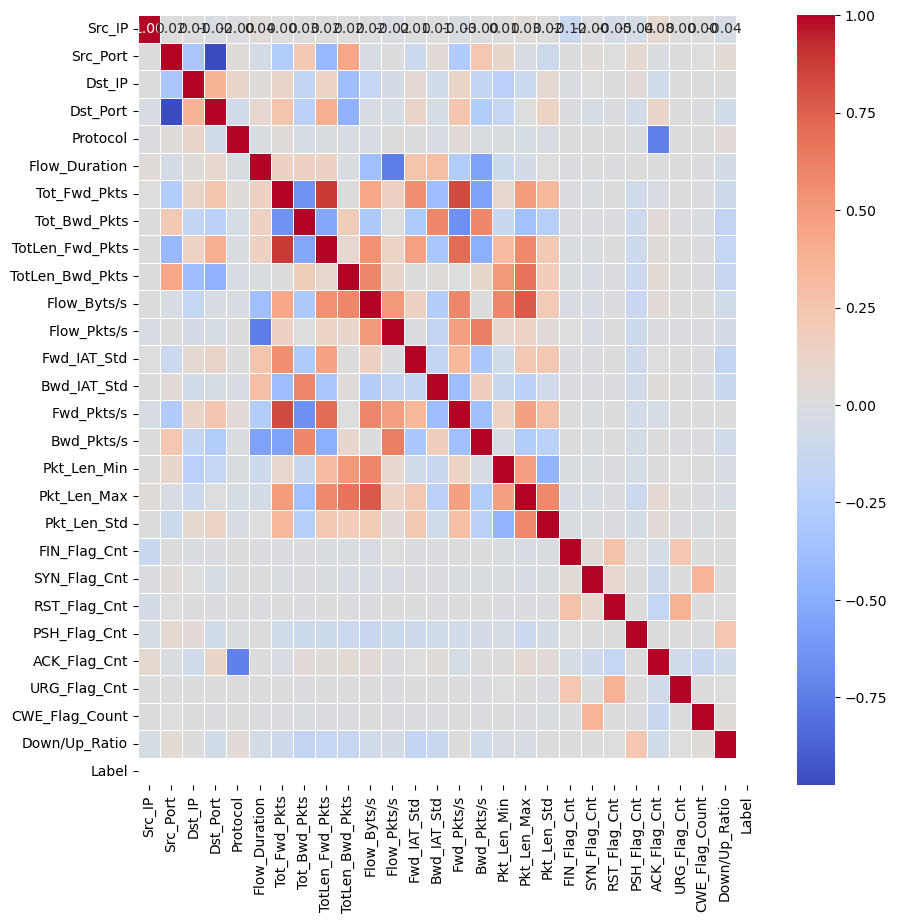

In [13]:
#plotting correlational matrix heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f')
plt.show()

In [14]:
dataset.shape

(27531, 28)

In [15]:
dataset.columns.tolist()

['Src_IP',
 'Src_Port',
 'Dst_IP',
 'Dst_Port',
 'Protocol',
 'Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Fwd_IAT_Std',
 'Bwd_IAT_Std',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Std',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'Down/Up_Ratio',
 'Label']

In [16]:
dataset.shape

(27531, 28)

In [17]:
dataset.dtypes

Src_IP               int64
Src_Port             int64
Dst_IP               int64
Dst_Port             int64
Protocol             int64
Flow_Duration        int64
Tot_Fwd_Pkts         int64
Tot_Bwd_Pkts         int64
TotLen_Fwd_Pkts    float64
TotLen_Bwd_Pkts    float64
Flow_Byts/s        float64
Flow_Pkts/s        float64
Fwd_IAT_Std        float64
Bwd_IAT_Std        float64
Fwd_Pkts/s         float64
Bwd_Pkts/s         float64
Pkt_Len_Min        float64
Pkt_Len_Max        float64
Pkt_Len_Std        float64
FIN_Flag_Cnt         int64
SYN_Flag_Cnt         int64
RST_Flag_Cnt         int64
PSH_Flag_Cnt         int64
ACK_Flag_Cnt         int64
URG_Flag_Cnt         int64
CWE_Flag_Count       int64
Down/Up_Ratio      float64
Label                int64
dtype: object

In [18]:
dataset

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,...,Pkt_Len_Std,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,Down/Up_Ratio,Label
17,3232235533,9020,3232235536,49784,6,120,1,1,30.0,1388.0,...,784.041666,0,0,0,0,1,0,0,1.0,0
47,3232235533,9020,3232235536,49784,6,73,0,2,0.0,0.0,...,0.000000,0,0,0,0,1,0,0,0.0,0
48,3232235533,9020,3232235536,49784,6,367,0,2,0.0,1388.0,...,801.362174,0,0,0,0,1,0,0,0.0,0
50,3232235536,49796,3232235533,9020,6,451,0,3,0.0,4164.0,...,0.000000,0,0,0,0,1,0,0,0.0,0
79,3232235536,49793,3232235533,9020,6,196,0,3,0.0,2806.0,...,679.000000,0,0,0,0,1,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625663,3232235521,80,3232235534,53178,6,333,3,1,4344.0,1448.0,...,0.000000,0,0,0,0,1,0,0,0.0,0
625724,3232235536,49799,3232235533,9020,6,403,0,3,0.0,4164.0,...,0.000000,0,0,0,0,1,0,0,0.0,0
625732,3232235533,9020,3232235536,49784,6,360,2,1,1418.0,1388.0,...,679.000000,0,0,0,0,1,0,0,0.0,0
625752,3232235533,9020,3232235536,49784,6,345,3,1,2806.0,1388.0,...,607.316063,0,0,0,0,1,0,0,0.0,0


In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# # Assuming 'dataset' is your DataFrame
# # Initialize the StandardScaler
# standard_scaler = StandardScaler()

# # Fit and transform the data
# dataset = pd.DataFrame(standard_scaler.fit_transform(dataset), columns=dataset.columns)




from sklearn.preprocessing import MinMaxScaler
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
dataset = pd.DataFrame(min_max_scaler.fit_transform(dataset), columns=dataset.columns)

In [20]:
x= dataset.drop('Label',axis=1)
y= dataset['Label']

In [21]:
from sklearn.model_selection import train_test_split

# First, split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Then, split the training data further into training and validation sets
# x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [22]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

input_dim = x_train.shape[1]

# Range of k values to test
k_values = range(2, 11)  # Try k from 2 to 10

# Empty list to store validation loss for each k
val_loss_per_k = []

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Loop over different k values
for k in k_values:
    print(f"Training with k = {k} folds...")
    
    # KFold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    fold_val_losses = []
    
    for train_index, val_index in kf.split(x_train):
        # Split data into train and validation sets for the current fold
        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        
        # Define the autoencoder model for each fold
        autoencoder = Sequential([
           Dense(128, activation='sigmoid', input_shape=(input_dim,)),
            Dense(64, activation='sigmoid'),
            Dense(64, activation='sigmoid'),
            Dense(32, activation='sigmoid'),
            Dense(16, activation='sigmoid'),
            Dense(8, activation='sigmoid'),
            Dense(16, activation='sigmoid'),
            Dense(32, activation='sigmoid'),
            Dense(64, activation='sigmoid'),
            Dense(64, activation='sigmoid'),
            Dense(128, activation='sigmoid'),
            Dense(input_dim, activation='sigmoid')
        ])
        
        # Compile the autoencoder model
        autoencoder.compile(optimizer='adam', loss=MeanSquaredError())
        
        # Train the model on the training fold and validate on the validation fold
        history = autoencoder.fit(x_train_fold, x_train_fold,
                                  epochs=100,
                                  batch_size=8,
                                  validation_data=(x_val_fold, x_val_fold),
                                  callbacks=[early_stopping],
                                  shuffle=True,
                                  verbose=0)  # Set verbose=0 to avoid too much output
        
        # Get the validation loss for the last epoch
        val_loss = min(history.history['val_loss'])
        fold_val_losses.append(val_loss)
    
    # Average the validation loss across all folds
    avg_val_loss = np.mean(fold_val_losses)
    val_loss_per_k.append(avg_val_loss)
    print(f"Avg validation loss for k={k}: {avg_val_loss}")
    
# Find the best k-value
best_k = k_values[np.argmin(val_loss_per_k)]
print(f"Best k-value: {best_k} with lowest validation loss: {min(val_loss_per_k)}")

# Now train the final model using the best k-value
kf = KFold(n_splits=best_k, shuffle=True, random_state=42)

for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    
    # Define and train the final autoencoder
    autoencoder = Sequential([
        Dense(128, activation='sigmoid', input_shape=(input_dim,)),
        Dense(64, activation='sigmoid'),
        Dense(32, activation='sigmoid'),
        Dense(16, activation='sigmoid'),
        Dense(8, activation='sigmoid'),
        Dense(16, activation='sigmoid'),
        Dense(32, activation='sigmoid'),
        Dense(64, activation='sigmoid'),
        Dense(128, activation='sigmoid'),
        Dense(input_dim, activation='relu')
    ])
    
    autoencoder.compile(optimizer='adam', loss=MeanSquaredError())
    
    # Train on the entire training data with the best k splits
    autoencoder.fit(x_train_fold, x_train_fold,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_val_fold, x_val_fold),
                    callbacks=[early_stopping],
                    shuffle=True)

# Final evaluation on test set
test_loss = autoencoder.evaluate(x_test, x_test)
print(f"Test loss after training with best k = {best_k}: {test_loss}")


Training with k = 2 folds...
Avg validation loss for k=2: 0.03723406605422497
Training with k = 3 folds...
Avg validation loss for k=3: 0.03729777658979098
Training with k = 4 folds...
Avg validation loss for k=4: 0.03724444750696421
Training with k = 5 folds...
Avg validation loss for k=5: 0.0372686080634594
Training with k = 6 folds...
Avg validation loss for k=6: 0.03726309475799402
Training with k = 7 folds...
Avg validation loss for k=7: 0.037241239100694656
Training with k = 8 folds...
Avg validation loss for k=8: 0.03724818630144
Training with k = 9 folds...
Avg validation loss for k=9: 0.03723809992273649
Training with k = 10 folds...
Avg validation loss for k=10: 0.037231136485934256
Best k-value: 10 with lowest validation loss: 0.037231136485934256
Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.1412 - val_loss: 0.1365
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1366 - val_loss: 0.1365
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

689/689 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Threshold for anomaly detection: 0.0015774505306697985
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Number of anomalies detected: 1337


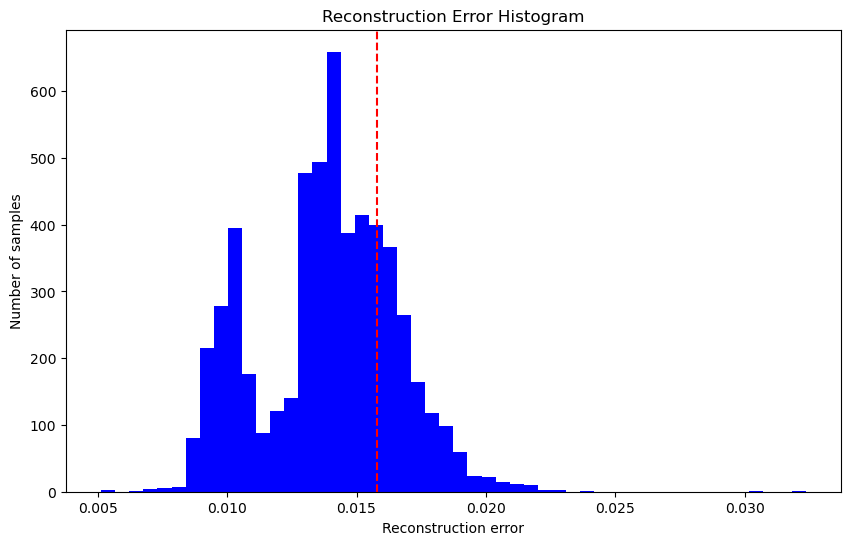

In [32]:
# Calculate reconstruction error on the training set
train_reconstructions = autoencoder.predict(x_train)
train_reconstruction_errors = tf.keras.losses.mse(x_train, train_reconstructions)

# Set a threshold for anomaly detection based on the training reconstruction errors
# You can either use the mean and standard deviation or the percentile approach
threshold = np.percentile(train_reconstruction_errors, 95)  # 95th percentile as threshold
print(f"Threshold for anomaly detection: {threshold*0.1}")

# Now calculate reconstruction error on the test set
reconstructions = autoencoder.predict(x_test)
reconstruction_error = 0.1*(tf.keras.losses.mse(x_test, reconstructions))

# Evaluate model using the reconstruction error
# Anomalies are where the reconstruction error is greater than the threshold

anomalies = reconstruction_error > threshold

num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")

# Visualize reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='blue')
plt.axvline(x=threshold, color='red', linestyle='--')
plt.xlabel("Reconstruction error")
plt.ylabel("Number of samples")
plt.title("Reconstruction Error Histogram")
plt.show()


173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Threshold for anomaly detection: 0.21918597258627415
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Number of anomalies detected: 9


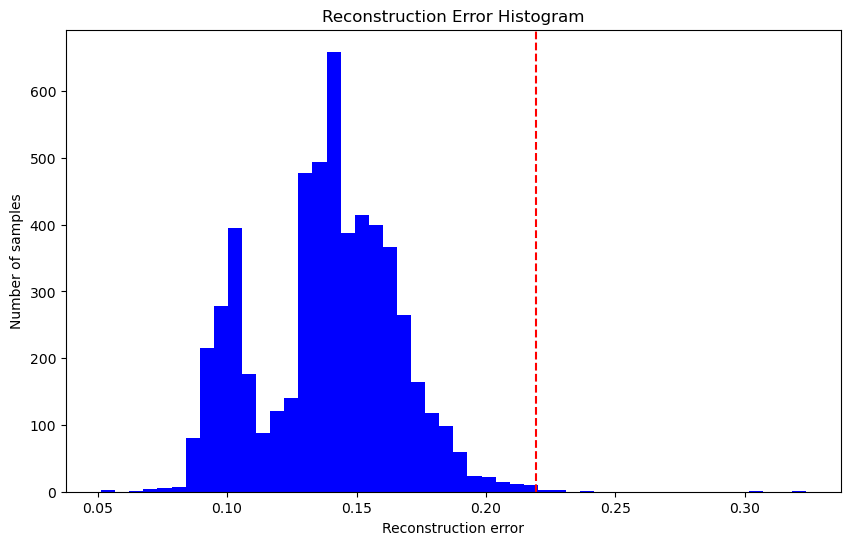

In [27]:
# Calculate reconstruction error on the training set
train_reconstructions = autoencoder.predict(x_test)
train_reconstruction_errors = tf.keras.losses.mse(x_test, train_reconstructions)

# Set a threshold for anomaly detection based on the training reconstruction errors
# You can either use the mean and standard deviation or the percentile approach
# threshold = np.percentile(train_reconstruction_errors, 95)  # 95th percentile as threshold
# threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
print(f"Threshold for anomaly detection: {threshold}")

# Now calculate reconstruction error on the test set
reconstructions = autoencoder.predict(x_test)
reconstruction_error = tf.keras.losses.mse(x_test, reconstructions)

# Evaluate model using the reconstruction error
# Anomalies are where the reconstruction error is greater than the threshold
anomalies = reconstruction_error > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")

# Visualize reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='blue')
plt.axvline(x=threshold, color='red', linestyle='--')
plt.xlabel("Reconstruction error")
plt.ylabel("Number of samples")
plt.title("Reconstruction Error Histogram")
plt.show()


In [27]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# history = autoencoder.fit(x_train, x_train,
#                           epochs=100,
#                           batch_size=8,
#                           validation_data=(x_test,x_test),
#                           callbacks=[early_stopping],
#                           shuffle=True
#                          )



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Step 1: Compute reconstruction error for the test data
reconstructions = autoencoder.predict(x_test)
reconstruction_errors = np.mean(np.abs(reconstructions - x_test), axis=1)

# Step 2: Set a threshold for classification
# You can set the threshold manually or compute it based on training reconstruction error
threshold = np.percentile(reconstruction_errors, 95)
# threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)

# Step 3: Predict the class based on the reconstruction error
# If error > threshold, classify as anomaly (attack), otherwise as normal (benign)
y_pred = [1 if error > threshold else 0 for error in reconstruction_errors]  # 1 = anomaly, 0 = normal

# Step 4: Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)  # Handle division by zero if no positives
recall = recall_score(y_test, y_pred, zero_division=1)  # Handle division by zero if no positives
f1 = f1_score(y_test, y_pred, zero_division=1)  # Handle division by zero if no positives

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Step 5: Compute ROC AUC score, handling the case where only one class is present in y_test
try:
    if len(np.unique(y_test)) > 1:  # Ensure both classes are present
        roc_auc = roc_auc_score(y_test, reconstruction_errors)
        print(f"ROC AUC: {roc_auc}")
    else:
        raise ValueError("Only one class present in y_test. ROC AUC is undefined.")
except ValueError as e:
    print(f"Error: {e}")

from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test contains true labels (0 for benign, 1 for anomaly)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9498819684038496
Precision: 0.0
Recall: 1.0
F1-Score: 0.0
Error: Only one class present in y_test. ROC AUC is undefined.


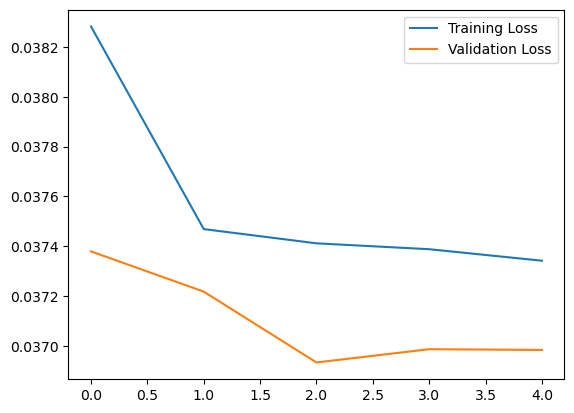

In [29]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [20]:
import numpy as np
from sklearn.metrics import roc_curve

# Step 1: Reconstruct the test data
reconstructed_test = autoencoder.predict(x_test)

# Step 2: Calculate reconstruction error (mean squared error)
reconstruction_error_test = np.mean(np.square(x_test - reconstructed_test), axis=1)

# Step 3: Compute the ROC curve using the reconstruction error and the true labels
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error_test)

# Step 4: Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

print(f"Optimal threshold: {threshold}")

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Optimal threshold: 1.1841879925086642


689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step
Threshold for anomaly detection: 0.049995237961411476
Number of anomalies detected: 312


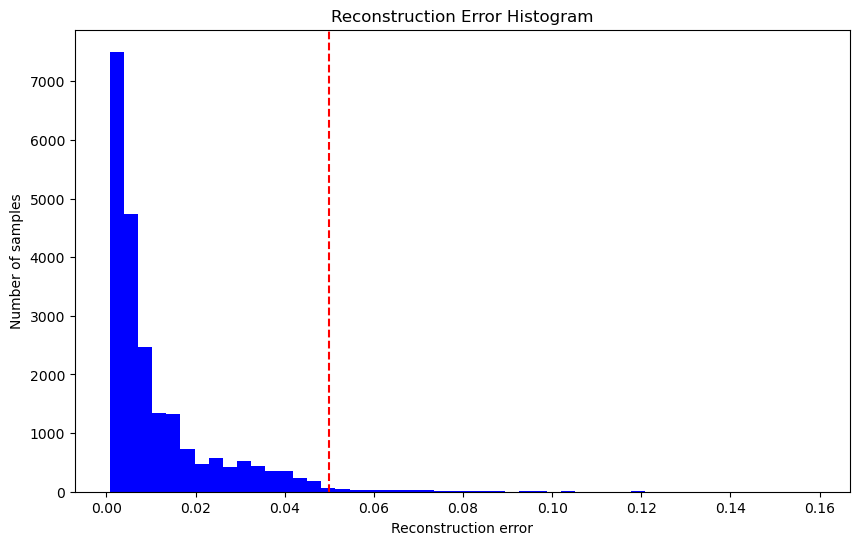

In [21]:
# Calculate reconstruction error on the test set
reconstructions = autoencoder.predict(x_train)
reconstruction_error = tf.keras.losses.mse(x_train, reconstructions)

# Set a threshold for anomaly detection
threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
print(f"Threshold for anomaly detection: {threshold}")

# Evaluate model using the reconstruction error
# Anomalies are where the reconstruction error is greater than the threshold
anomalies = reconstruction_error > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")
# Visualize reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='blue')
plt.axvline(x=threshold, color='red', linestyle='--')
plt.xlabel("Reconstruction error")
plt.ylabel("Number of samples")
plt.title("Reconstruction Error Histogram")
plt.show()

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Threshold for anomaly detection: 0.0880028884857893
Number of anomalies detected: 49


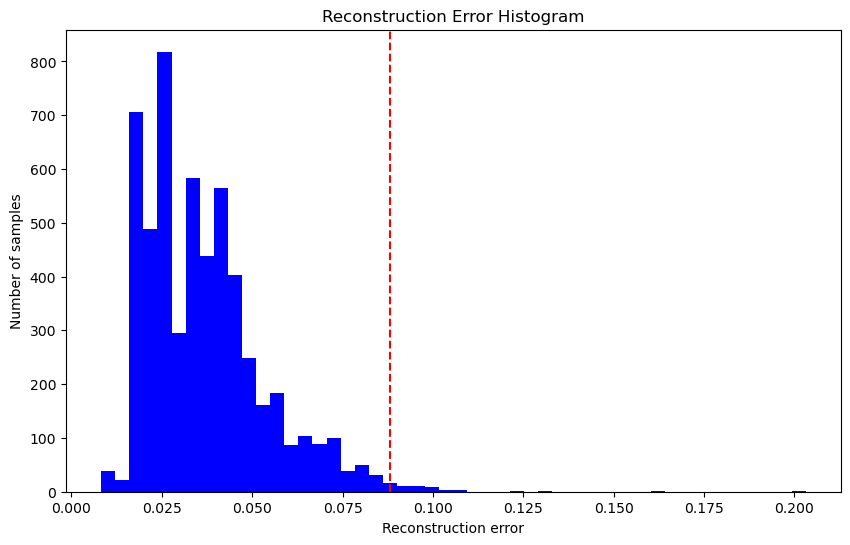

In [25]:
# Calculate reconstruction error on the test set
reconstructions = autoencoder.predict(x_test)
reconstruction_error = tf.keras.losses.mse(x_test, reconstructions)

# Set a threshold for anomaly detection
# threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
print(f"Threshold for anomaly detection: {threshold}")

# Evaluate model using the reconstruction error
# Anomalies are where the reconstruction error is greater than the threshold
anomalies = reconstruction_error > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")
# Visualize reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='blue')
plt.axvline(x=threshold, color='red', linestyle='--')
plt.xlabel("Reconstruction error")
plt.ylabel("Number of samples")
plt.title("Reconstruction Error Histogram")
plt.show()

In [88]:
import numpy as np
from sklearn.metrics import accuracy_score

# Step 1: Convert TensorFlow tensor to NumPy array before comparison
reconstruction_error_test_np = np.array(reconstruction_error_test)  # Convert to NumPy array

# Step 2: Classify the test data based on the threshold
predicted_labels = (reconstruction_error_test_np > threshold).astype(int)  # 1 for anomalies, 0 for normal

# Step 3: Calculate accuracy by comparing predicted labels to true labels
accuracy = accuracy_score(y_test, predicted_labels)

print(f"Accuracy of the model: {accuracy * 100:.2f}%")


Accuracy of the model: 100.00%


In [92]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np

# Step 1: Reconstruct the training and test data
reconstructed_train = autoencoder.predict(x_train)
reconstructed_test = autoencoder.predict(x_test)

# Step 2: Calculate reconstruction errors (mean squared error) for training and test sets
reconstruction_error_train = np.mean(np.square(x_train - reconstructed_train), axis=1)
reconstruction_error_test = np.mean(np.square(x_test - reconstructed_test), axis=1)

# Step 3: Classify the train and test data based on the threshold
predicted_labels_train = (reconstruction_error_train > threshold).astype(int)  # 1 for anomalies, 0 for normal
predicted_labels_test = (reconstruction_error_test > threshold).astype(int)    # 1 for anomalies, 0 for normal

# Step 4: Calculate various metrics for both training and testing data

# Training set
accuracy_train = accuracy_score(y_train, predicted_labels_train)
f1_train = f1_score(y_train, predicted_labels_train)
precision_train = precision_score(y_train, predicted_labels_train)
recall_train = recall_score(y_train, predicted_labels_train)
conf_matrix_train = confusion_matrix(y_train, predicted_labels_train)

# Testing set
accuracy_test = accuracy_score(y_test, predicted_labels_test)
f1_test = f1_score(y_test, predicted_labels_test)
precision_test = precision_score(y_test, predicted_labels_test)
recall_test = recall_score(y_test, predicted_labels_test)
conf_matrix_test = confusion_matrix(y_test, predicted_labels_test)

# Step 5: Print the results for training data
print("Training Data:")
print(f"Accuracy: {accuracy_train * 100:.2f}%")

# Step 6: Print the results for testing data
print("\nTesting Data:")
print(f"Accuracy: {accuracy_test * 100:.2f}%")

689/689 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training Data:
Accuracy: 100.00%

Testing Data:
Accuracy: 100.00%


In [39]:
threshold = 0.0914858290481404

In [40]:
import pickle

# Save the autoencoder model using Keras' save function
autoencoder.save('autoencoder.h5')  # Saves the model in HDF5 format

# Now save the threshold value separately using pickle
with open('threshold-autoencoder.pkl', 'wb') as f:
    pickle.dump(threshold, f)

print("Model and threshold saved successfully!")


Model and threshold saved successfully!


In [94]:
import pickle
from tensorflow.keras.models import load_model

# Load the autoencoder model
autoencoder = load_model('autoencoder.h5')

# Load the threshold value from the pickle file
with open('threshold-autoencoder.pkl', 'rb') as f:
    threshold = pickle.load(f)

print("Model and threshold loaded successfully!")


Model and threshold loaded successfully!


In [33]:
threshold

0.18034612612166945

In [90]:
import numpy as np  # Ensure you have this import at the top if it's not already
import numpy as np
from sklearn.metrics import accuracy_score
# Reconstruct the test set
reconstructions_test = autoencoder.predict(x_test)
reconstruction_error_test = tf.keras.losses.mse(x_test, reconstructions_test)

# Predict whether each test point is an anomaly
predicted_anomalies = (reconstruction_error_test > threshold).numpy()  # Convert Tensor to NumPy array
predicted_labels = predicted_anomalies.astype(int)  # Convert to 1 for anomalies, 0 for normal

# Compare with true labels
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")


173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
Accuracy: 1.0000


In [ ]:
# import numpy as np  # Ensure you have this import at the top if it's not already

# # Reconstruct the test set
# reconstructions_test1 = autoencoder.predict(x_train)
# reconstruction_error_test1 = tf.keras.losses.mse(x_train, reconstructions_test1)

# # Predict whether each test point is an anomaly
# predicted_anomalies1 = (reconstruction_error_test1 > threshold).numpy()  # Convert Tensor to NumPy array
# predicted_labels1 = predicted_anomalies1.astype(int)  # Convert to 1 for anomalies, 0 for normal

# # Compare with true labels
# accuracy = accuracy_score(y_test, predicted_labels1)
# print(f"Accuracy: {accuracy:.4f}")


In [24]:
Anomaly_df = df[df['Label'] == 1]

Anomaly_df.to_csv('Anomaly_df.csv', index=False)



In [25]:
Anomaly_df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,1,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,1,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625777,192.168.0.13-192.168.0.16-9020-56266-6,192.168.0.16,56266,192.168.0.13,9020,6,10/09/2019 01:47:49 AM,116,0,2,...,0.0,0.0,0.0,116.0,0.000000,116.0,116.0,1,Mirai,Mirai-Hostbruteforceg
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,1,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,1,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,1,Scan,Scan Port OS


In [26]:
df_a = Anomaly_df

In [27]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585710 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            585710 non-null  object 
 1   Src_IP             585710 non-null  object 
 2   Src_Port           585710 non-null  int64  
 3   Dst_IP             585710 non-null  object 
 4   Dst_Port           585710 non-null  int64  
 5   Protocol           585710 non-null  int64  
 6   Timestamp          585710 non-null  object 
 7   Flow_Duration      585710 non-null  int64  
 8   Tot_Fwd_Pkts       585710 non-null  int64  
 9   Tot_Bwd_Pkts       585710 non-null  int64  
 10  TotLen_Fwd_Pkts    585710 non-null  float64
 11  TotLen_Bwd_Pkts    585710 non-null  float64
 12  Fwd_Pkt_Len_Max    585710 non-null  float64
 13  Fwd_Pkt_Len_Min    585710 non-null  float64
 14  Fwd_Pkt_Len_Mean   585710 non-null  float64
 15  Fwd_Pkt_Len_Std    585710 non-null  float64
 16  Bwd_Pkt

In [28]:
attack_df = df_a

In [29]:
columns_to_drop = [
                   'Flow_IAT_Mean',
                    'Flow_IAT_Std',
                    'Flow_IAT_Max',
                    'Flow_IAT_Min',
                    'Fwd_IAT_Tot',
                    'Fwd_IAT_Mean',
                    'Fwd_IAT_Max',
                    'Fwd_IAT_Min',
                    'Bwd_IAT_Tot',
                    'Bwd_IAT_Mean',
                    'Bwd_IAT_Max',
                    'Bwd_IAT_Min',
                     'Fwd_Pkt_Len_Max',
                     'Fwd_Pkt_Len_Min',
                     'Fwd_Pkt_Len_Mean',
                     'Fwd_Pkt_Len_Std',
                     'Bwd_Pkt_Len_Max',
                     'Bwd_Pkt_Len_Min',
                     'Bwd_Pkt_Len_Mean',
                     'Bwd_Pkt_Len_Std',
                     'Pkt_Len_Mean',
                    'Pkt_Len_Var',
                    'Idle_Mean',
                     'Idle_Std',
                     'Idle_Max',
                     'Idle_Min',
                     'Subflow_Fwd_Pkts',
                 'Subflow_Fwd_Byts',
                 'Subflow_Bwd_Pkts',
                 'Subflow_Bwd_Byts',
                    'Fwd_Header_Len',
                'Bwd_Header_Len',
                'Fwd_PSH_Flags',
                'Bwd_PSH_Flags',
                'Fwd_URG_Flags',
                'Fwd_Byts/b_Avg',
                 'Fwd_Pkts/b_Avg',
                 'Fwd_Blk_Rate_Avg',
                 'Bwd_Byts/b_Avg',
                 'Bwd_Pkts/b_Avg',
                 'Bwd_Blk_Rate_Avg',
                 'Init_Fwd_Win_Byts',
                 'Init_Bwd_Win_Byts',
                    'Fwd_Seg_Size_Min',
                 'Active_Mean',
                 'Active_Std',
                 'Active_Max',
                 'Active_Min',
                'Pkt_Size_Avg',
             'Fwd_Seg_Size_Avg',
             'Bwd_Seg_Size_Avg',
             'Fwd_Act_Data_Pkts',
                'Bwd_URG_Flags',
                'ECE_Flag_Cnt',  
]

attack_df = attack_df.drop(columns=columns_to_drop)

In [30]:
columns_to_drop = [
                  
                    'Flow_ID',
                    'Timestamp',
                    'Label',
                   'Cat',
                   'Sub_Cat',
]

attack_df = attack_df.drop(columns=columns_to_drop)

In [109]:
import ipaddress
import pandas as pd

# Assuming attack_df is your dataframe

# Convert IPs to integers
attack_df['Src_IP'] = attack_df['Src_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
attack_df['Dst_IP'] = attack_df['Dst_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
attack_df

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,...,Pkt_Len_Max,Pkt_Len_Std,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,Down/Up_Ratio
0,3232235533,10000,3232235536,10101,17,75,1,1,982.0,1430.0,...,1430.0,258.652921,0,0,0,0,0,0,0,1.0
1,3735073668,2179,3232235533,554,6,5310,1,2,0.0,0.0,...,0.0,0.000000,0,1,0,0,0,0,0,2.0
2,3232235536,52727,3232235533,9020,6,141,0,3,0.0,2806.0,...,1388.0,679.000000,0,0,0,0,1,0,0,0.0
3,3232235536,52964,3232235533,9020,6,151,0,2,0.0,2776.0,...,1388.0,0.000000,0,0,0,0,1,0,0,0.0
4,3232235521,36763,4026531834,1900,17,153,2,1,886.0,420.0,...,452.0,15.176737,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625777,3232235536,56266,3232235533,9020,6,116,0,2,0.0,1418.0,...,1388.0,784.041666,0,0,0,0,1,0,0,0.0
625778,3232235544,56112,3529090138,8043,17,277,1,1,18.0,18.0,...,18.0,0.000000,0,0,0,0,0,0,0,1.0
625779,3733171188,4570,3232235533,554,6,1658,0,2,0.0,0.0,...,0.0,0.000000,0,1,0,0,0,0,0,0.0
625780,3232235536,52739,3232235533,9020,6,77,1,1,0.0,0.0,...,0.0,0.000000,0,0,0,0,1,0,0,1.0


In [110]:
attack_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585710 entries, 0 to 625782
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Src_IP           585710 non-null  int64  
 1   Src_Port         585710 non-null  int64  
 2   Dst_IP           585710 non-null  int64  
 3   Dst_Port         585710 non-null  int64  
 4   Protocol         585710 non-null  int64  
 5   Flow_Duration    585710 non-null  int64  
 6   Tot_Fwd_Pkts     585710 non-null  int64  
 7   Tot_Bwd_Pkts     585710 non-null  int64  
 8   TotLen_Fwd_Pkts  585710 non-null  float64
 9   TotLen_Bwd_Pkts  585710 non-null  float64
 10  Flow_Byts/s      585710 non-null  float64
 11  Flow_Pkts/s      585710 non-null  float64
 12  Fwd_IAT_Std      585710 non-null  float64
 13  Bwd_IAT_Std      585710 non-null  float64
 14  Fwd_Pkts/s       585710 non-null  float64
 15  Bwd_Pkts/s       585710 non-null  float64
 16  Pkt_Len_Min      585710 non-null  float64
 

In [111]:
attack_df

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,...,Pkt_Len_Max,Pkt_Len_Std,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,Down/Up_Ratio
0,3232235533,10000,3232235536,10101,17,75,1,1,982.0,1430.0,...,1430.0,258.652921,0,0,0,0,0,0,0,1.0
1,3735073668,2179,3232235533,554,6,5310,1,2,0.0,0.0,...,0.0,0.000000,0,1,0,0,0,0,0,2.0
2,3232235536,52727,3232235533,9020,6,141,0,3,0.0,2806.0,...,1388.0,679.000000,0,0,0,0,1,0,0,0.0
3,3232235536,52964,3232235533,9020,6,151,0,2,0.0,2776.0,...,1388.0,0.000000,0,0,0,0,1,0,0,0.0
4,3232235521,36763,4026531834,1900,17,153,2,1,886.0,420.0,...,452.0,15.176737,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625777,3232235536,56266,3232235533,9020,6,116,0,2,0.0,1418.0,...,1388.0,784.041666,0,0,0,0,1,0,0,0.0
625778,3232235544,56112,3529090138,8043,17,277,1,1,18.0,18.0,...,18.0,0.000000,0,0,0,0,0,0,0,1.0
625779,3733171188,4570,3232235533,554,6,1658,0,2,0.0,0.0,...,0.0,0.000000,0,1,0,0,0,0,0,0.0
625780,3232235536,52739,3232235533,9020,6,77,1,1,0.0,0.0,...,0.0,0.000000,0,0,0,0,1,0,0,1.0


18304/18304 ━━━━━━━━━━━━━━━━━━━━ 18s 976us/step
Threshold for anomaly detection: 1.1642858290481404
Number of anomalies detected: 585710


ValueError: supplied range of [667630050476032.0, inf] is not finite

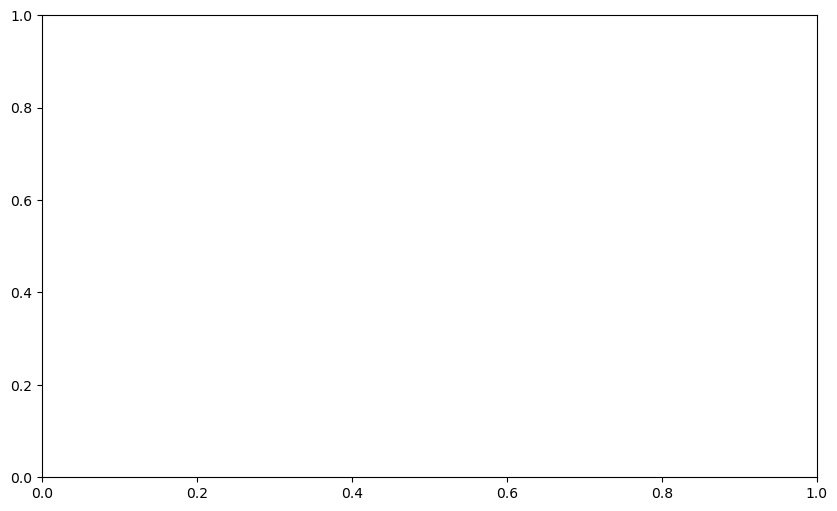

In [112]:
# Calculate reconstruction error on the test set
reconstructions = autoencoder.predict(attack_df)
reconstruction_error = tf.keras.losses.mse(attack_df, reconstructions)

# Set a threshold for anomaly detection
# threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
print(f"Threshold for anomaly detection: {threshold}")

# Evaluate model using the reconstruction error
# Anomalies are where the reconstruction error is greater than the threshold
anomalies = reconstruction_error > threshold
num_anomalies = np.sum(anomalies)
print(f"Number of anomalies detected: {num_anomalies}")
# Visualize reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='blue')
plt.axvline(x=threshold, color='red', linestyle='--')
plt.xlabel("Reconstruction error")
plt.ylabel("Number of samples")
plt.title("Reconstruction Error Histogram")
plt.show()

### 

In [ ]:
# Save the model as a TensorFlow SavedModel
autoencoder.save('autoencoder_model')

print("Model saved as 'autoencoder_model' folder")


In [39]:
import pickle

# Save the autoencoder model using Keras' save function
autoencoder.save('autoencoder_model.h5')  # Saves the model in HDF5 format

# Now save the threshold value separately using pickle
with open('threshold.pkl', 'wb') as f:
    pickle.dump(threshold, f)

print("Model and threshold saved successfully!")


Model and threshold saved successfully!


In [ ]:
import pickle
from tensorflow.keras.models import load_model

# Load the autoencoder model
autoencoder = load_model('autoencoder_model.h5')

# Load the threshold value from the pickle file
with open('threshold.pkl', 'rb') as f:
    threshold = pickle.load(f)

print("Model and threshold loaded successfully!")


In [ ]:
threshold

In [31]:
import pandas as pd

# Load the CSV file
dfa = pd.read_csv('/Users/M S I/Desktop/iot/IoT Network Intrusion Dataset.csv')  

# Example of converting text labels to binary values
dfa['Label'] = dfa['Label'].map({'Normal': 0, 'Anomaly': 1})

In [33]:
dataset_all = dfa

In [34]:
import ipaddress
import pandas as pd

# Assuming dataset_all is your dataframe

# Convert IPs to integers
dataset_all['Src_IP'] = dataset_all['Src_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
dataset_all['Dst_IP'] = dataset_all['Dst_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [35]:
columns_to_drop = [
                    'Flow_ID',
                    'Timestamp',
                    # 'Label',
                   'Cat',
                   'Sub_Cat',
]
dataset_all = dataset_all.drop(columns=columns_to_drop)

In [39]:
# Check for missing values
missing_values = dataset_all.isnull().sum()

# Check for duplicate rows
duplicates = dataset_all.duplicated().sum()

missing_values, duplicates

# Check for duplicate rows
duplicates = dataset_all[dataset_all.duplicated()]

#Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

# Remove duplicate rows
dataset_all = dataset_all.drop_duplicates()


Duplicate Rows:
            Src_IP  Src_Port      Dst_IP  Dst_Port  Protocol  Flow_Duration  \
183     3232235536     52717  3232235533      9020         6            125   
624     3232235536     52717  3232235533      9020         6             77   
645     3232235533     56361  3232235536     10101        17            192   
916     3232235533     10000  3232235536     10101        17            245   
935     3232235533     39310  2090661267      7760         6            119   
...            ...       ...         ...       ...       ...            ...   
625732  3232235533      9020  3232235536     49784         6            360   
625752  3232235533      9020  3232235536     49784         6            345   
625753  3547259470       443  3232235543     52366         6            153   
625767  3232235544     51993  3529090138      8899        17             16   
625781  3232235533      9020  3232235536     49784         6            240   

        Tot_Fwd_Pkts  Tot_Bwd_Pkts 

In [37]:
columns_to_drop = [
                    'Flow_IAT_Mean',
                    'Flow_IAT_Std',
                    'Flow_IAT_Max',
                    'Flow_IAT_Min',
                    'Fwd_IAT_Tot',
                    'Fwd_IAT_Mean',
                    'Fwd_IAT_Max',
                    'Fwd_IAT_Min',
                    'Bwd_IAT_Tot',
                    'Bwd_IAT_Mean',
                    'Bwd_IAT_Max',
                    'Bwd_IAT_Min',
                     'Fwd_Pkt_Len_Max',
                     'Fwd_Pkt_Len_Min',
                     'Fwd_Pkt_Len_Mean',
                     'Fwd_Pkt_Len_Std',
                     'Bwd_Pkt_Len_Max',
                     'Bwd_Pkt_Len_Min',
                     'Bwd_Pkt_Len_Mean',
                     'Bwd_Pkt_Len_Std',
                     'Pkt_Len_Mean',
                    'Pkt_Len_Var',
                    'Idle_Mean',
                     'Idle_Std',
                     'Idle_Max',
                     'Idle_Min',
                     'Subflow_Fwd_Pkts',
                 'Subflow_Fwd_Byts',
                 'Subflow_Bwd_Pkts',
                 'Subflow_Bwd_Byts',
                    'Fwd_Header_Len',
                'Bwd_Header_Len',
                'Fwd_PSH_Flags',
                'Bwd_PSH_Flags',
                'Fwd_URG_Flags',
                'Fwd_Byts/b_Avg',
                 'Fwd_Pkts/b_Avg',
                 'Fwd_Blk_Rate_Avg',
                 'Bwd_Byts/b_Avg',
                 'Bwd_Pkts/b_Avg',
                 'Bwd_Blk_Rate_Avg',
                 'Init_Fwd_Win_Byts',
                 'Init_Bwd_Win_Byts',
                    'Fwd_Seg_Size_Min',
                 'Active_Mean',
                 'Active_Std',
                 'Active_Max',
                 'Active_Min',
                'Pkt_Size_Avg',
             'Fwd_Seg_Size_Avg',
             'Bwd_Seg_Size_Avg',
             'Fwd_Act_Data_Pkts',
                'Bwd_URG_Flags',
                'ECE_Flag_Cnt',                  
]
dataset_all = dataset_all.drop(columns=columns_to_drop)

In [43]:
import numpy as np

# Check for inf or -inf in the dataset
np.isinf(dataset_all).sum()

dataset_all = np.nan_to_num(dataset_all, nan=0.0, posinf=1e10, neginf=-1e10)

np.isnan(dataset_all).sum()

dataset_all = np.nan_to_num(dataset_all, nan=0.0)


In [45]:


from sklearn.preprocessing import StandardScaler
import pandas as pd

# # Assuming 'dataset_all' is your DataFrame
# # Initialize the StandardScaler
# standard_scaler = StandardScaler()

# # Fit and transform the data
# dataset_all = pd.DataFrame(standard_scaler.fit_transform(dataset_all), columns=dataset_all.columns)




from sklearn.preprocessing import MinMaxScaler
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
dataset_all = pd.DataFrame(min_max_scaler.fit_transform(dataset_all), columns=dataset_all.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'